## MIND MASH is a prototype research tool under active development. Please send bugs/feedback/feature requests to ahcummi@cse-cst.gc.ca or create an issue on https://gitlab.coi.nsa.ic.gov/ahcummi1/mindmash2/issues

MIND MASH is a tool that lets you visualise, explore label and build machine learning models on arbitrary data relatively easily. This notebook will run you through exporting data into an appropriate format, importing it into MIND MASH and tour some of the features.


# Preparing Data

In [151]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import random
import matplotlib.pyplot as plt

We're going to use the standard Iris dataset here. This is a small toy dataset for classifying four species of Iris by their sepal and petal sizes. We're going to make it a bit more interesting, and realistic, by assuming that we don't know the labels for most of our samples. Then we can use MIND MASH to try and recover some of those lost labels and build a model to predict those that we can't.

Let's start by loading the data and putting the numeric features, and species name values into a pandas dataframe.

In [152]:
iris = load_iris()
df = pd.DataFrame()
# load the features
for fn, data_column in zip(iris.feature_names, iris.data.T):
    df[fn] = data
#  map target (an integer) to the target name
df["actual_species"] = [iris.target_names[i] for i in iris.target]
print("Label names are:", iris.target_names)
# shuffle the order of the rows
df = df.sample(frac=1)

Label names are: ['setosa' 'versicolor' 'virginica']


We're going to pretend that we don't have proper labels for 95% of our data, and we have no examples of the _versicolor_ species but that we do have some other context that we can't use as features, but could use to figure out what the correct class was. For this toy example, our context is going to be a random selection of characters from the actual species name. Your real data will probably have a less trivial type of context.

In [153]:
# lets forget 95% of labels
df["species"] = df["actual_species"]
forget_species = np.random.rand(len(df["species"])) < 0.95
df.loc[forget_species, "species"] = ""

# and let's entirely forget about the versicolor species
df.loc[df["actual_species"] == "versicolor", "species"] = ""

# and pick 0-4 characters to act as our context.
df["context"] = df["actual_species"].map(lambda x: ''.join(random.sample(x, random.randint(0,4))))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_species,species,context
136,2.4,2.4,2.4,2.4,virginica,,av
46,0.2,0.2,0.2,0.2,setosa,,s
105,2.1,2.1,2.1,2.1,virginica,,arg
148,2.3,2.3,2.3,2.3,virginica,,ain
125,1.8,1.8,1.8,1.8,virginica,,
21,0.4,0.4,0.4,0.4,setosa,,saes
149,1.8,1.8,1.8,1.8,virginica,,c
49,0.2,0.2,0.2,0.2,setosa,,s
144,2.5,2.5,2.5,2.5,virginica,,a
47,0.2,0.2,0.2,0.2,setosa,,ase


Now we can export our data as a CSV file, for import into MIND MASH.

In [154]:
# drop the answers, or this is no fun
df.drop("actual_species", axis=1).to_csv("~/data/amnesia_iris.csv", index_label="index")

# Importing Data

Now we want to import this data file into MINDMASH. Go to MIND MASH location (ALPR instance is: https://merlin.cd.cse:5555), and log in with your LDAP creds. You should get to the "Create Project" page. Set the name of the project to be "Iris", select "FileIO" as the data souce and click next. Then click on the box and upload your CSV file.

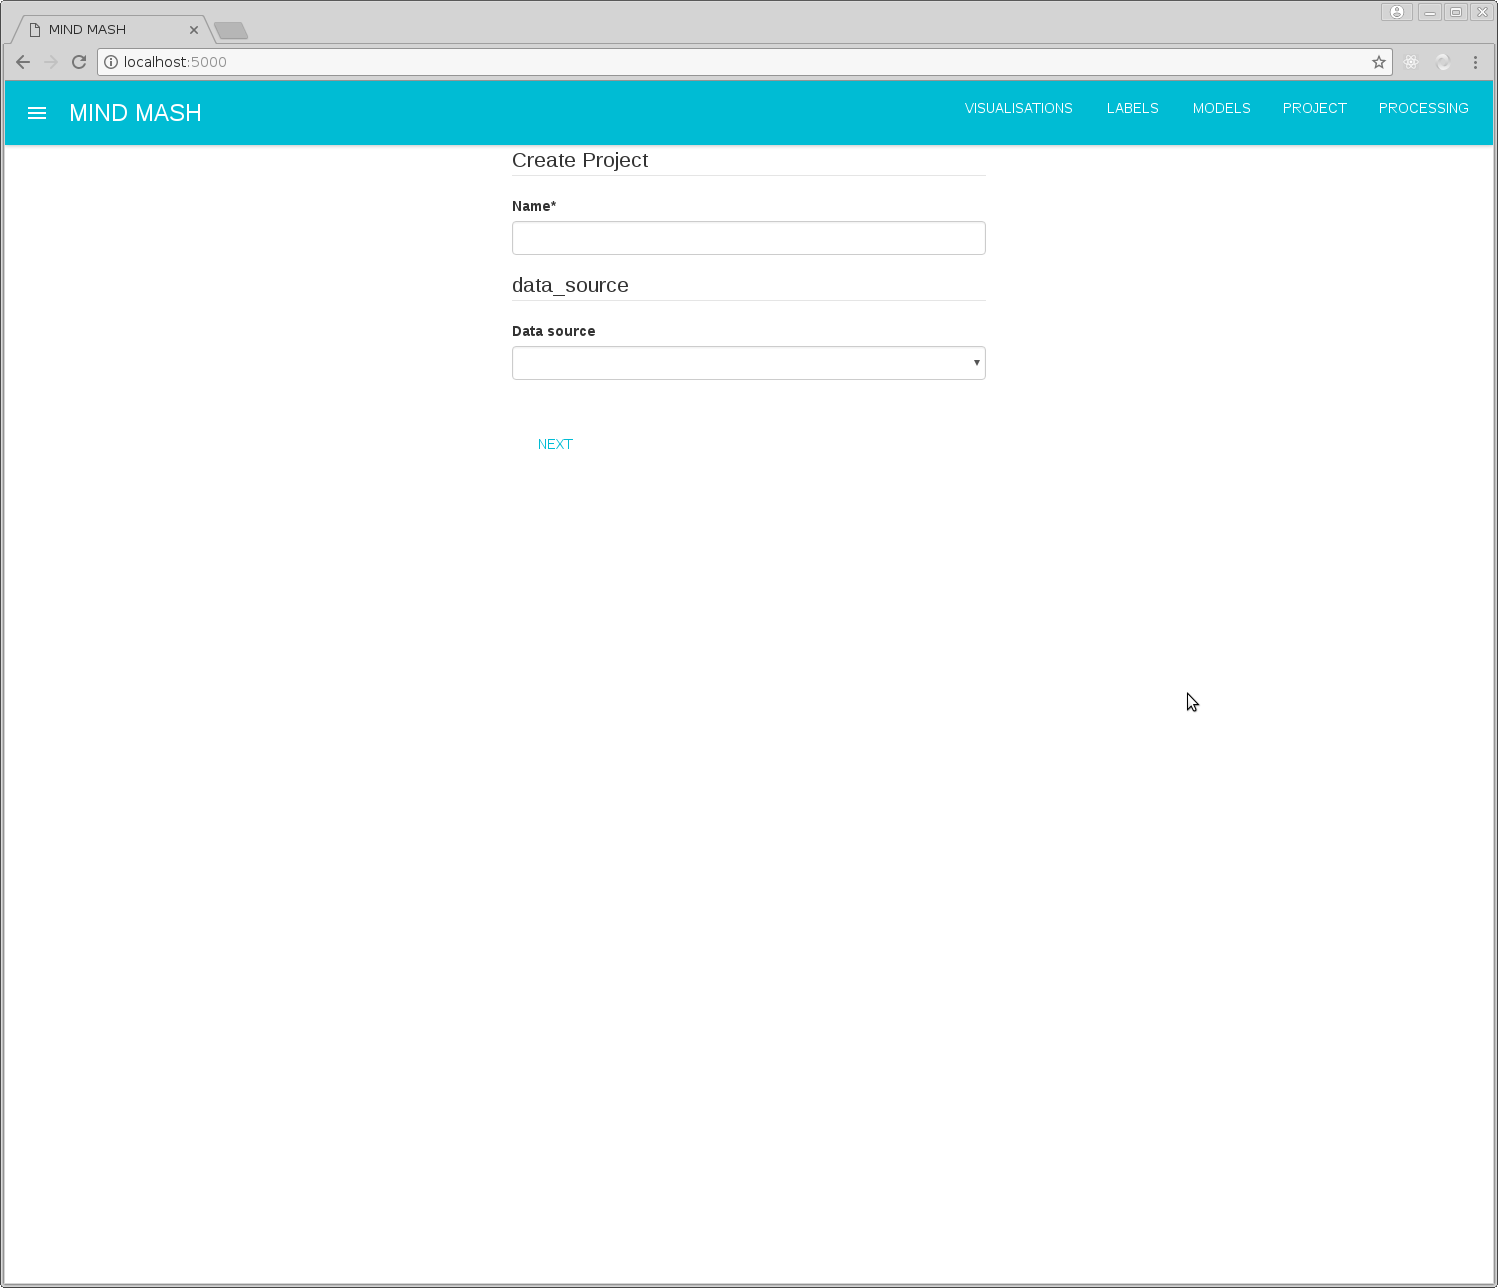

You should then end up on this screen, where we can import our data into MIND MASH by telling it what it should do with each column. The key areas here are the column table on the left and the field import area on the right. You select columns that you want to import, add them to the current set of fields, and then tell MIND MASH how it should treat that data. 

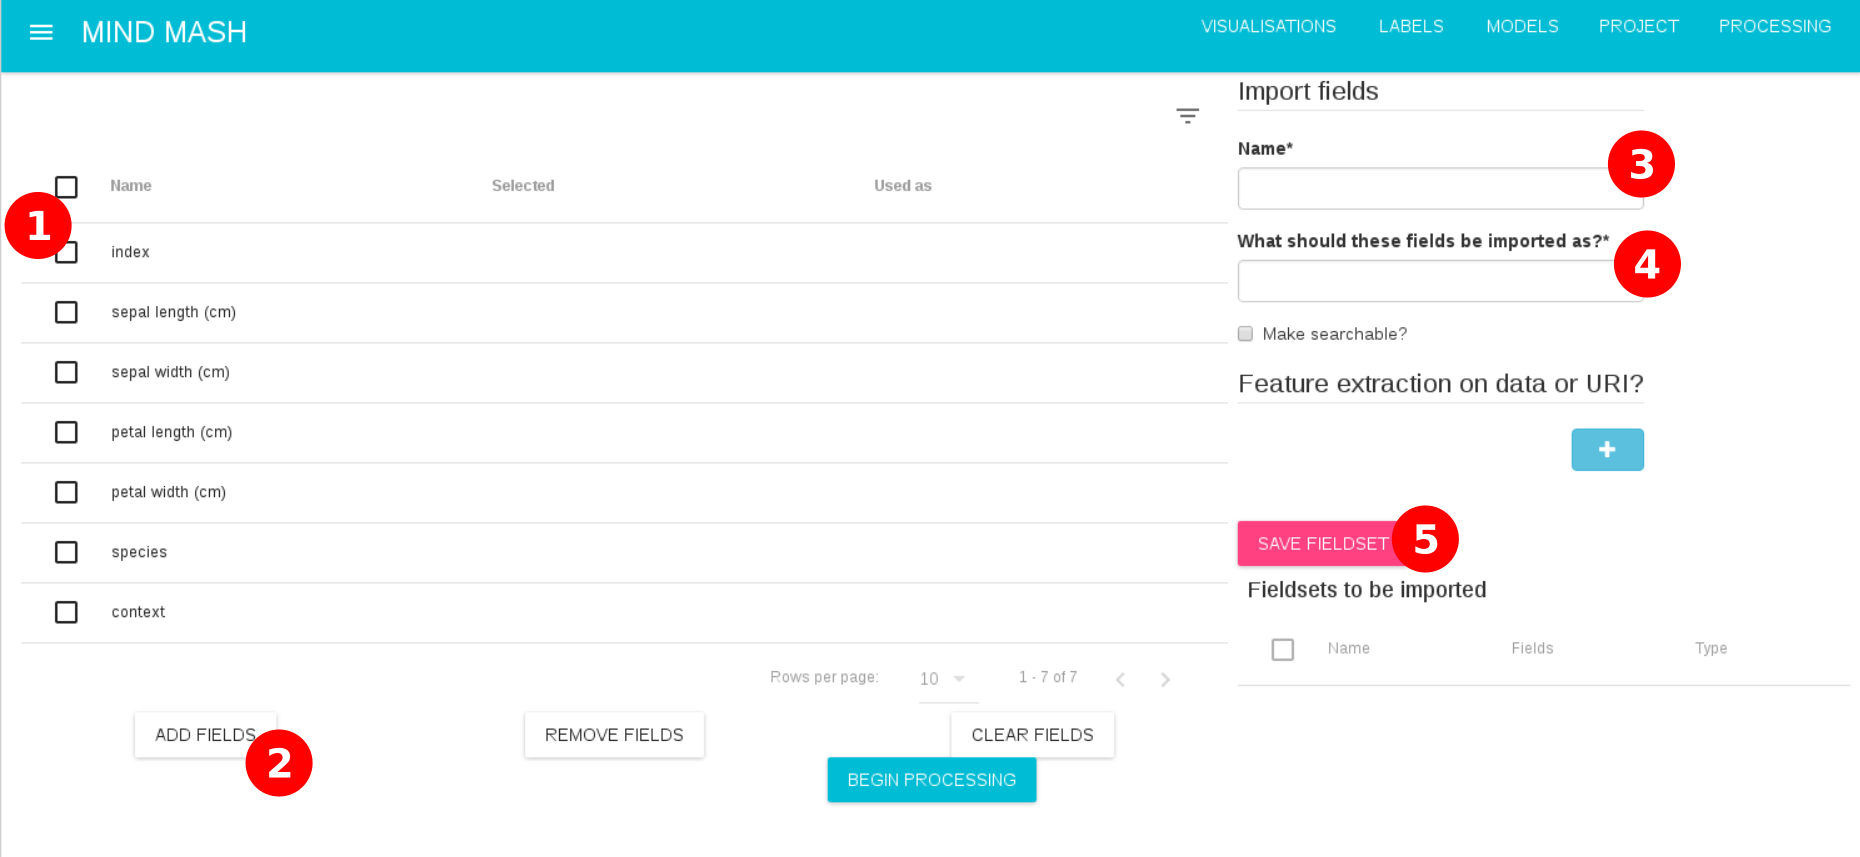

Lets import the index column first (in real data this would be some unique identifier to look up data points elsewhere). 
1. Click the tickbox to the left of index to select the column
2. Click the "Add fields" button. A tick should appear in index's row
3. Name the field. Using index again is fine.
4. Select how MIND MASH should treat these fields: we want to import them as identifiers.
5. Click the "Save Fieldset" button. 

The new fieldset should appear in the "Fieldsets to be imported table. We now want to repeat that for the other columns.

* For our features:
    1. Click the tickbox next to each of of the petal/sepal length/width rows.
    2. After clicking "Add fields" there should be four ticks by the rows.
    3. Call the field "measurements".
    4. We want to import these as features.
    5. And then save them again.
* For our labels:
    * Select just the species row and click add fields
    * Name it label, and set it to be imported as "Labels"
* For our context:
    * Select the context row
    * Call it "context", and import it as "Just Metadata"
    * Make sure the "make searchable" checkbox is ticked
Your "Fieldsets to be imported should look like this afterwards:

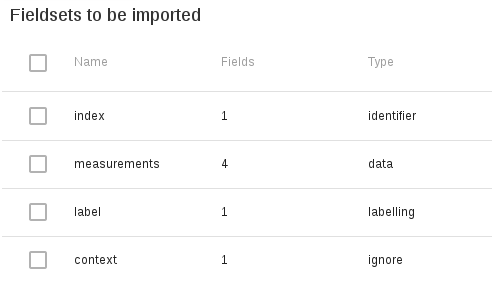

Then click the "Begin Processing" button to import the data into MIND MASH.    

# Creating Simple Displays to Show Data

You'll be dumped onto a fairly empty screen like this. Be patient, initially loading can take a while.

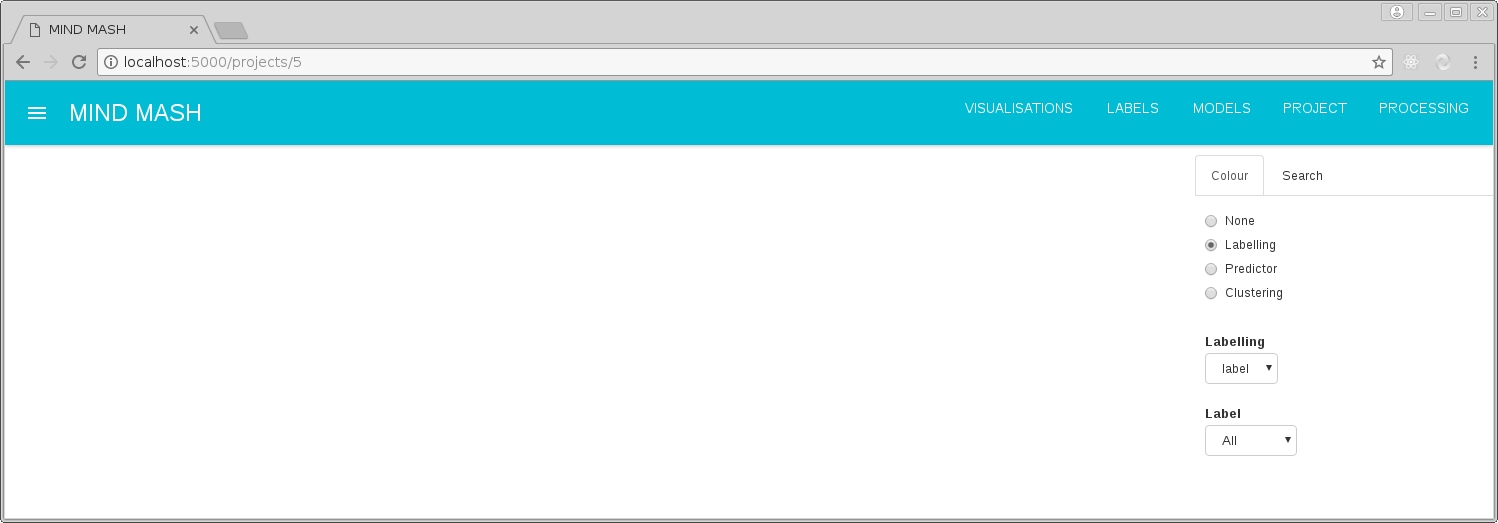

MIND MASH is a series of linked displays that highlight different aspects of your data. Let's start by creating a simple table display of our data, so we can check it imported correctly. Navigate to the "Visualisations" menu and click "Add Display".

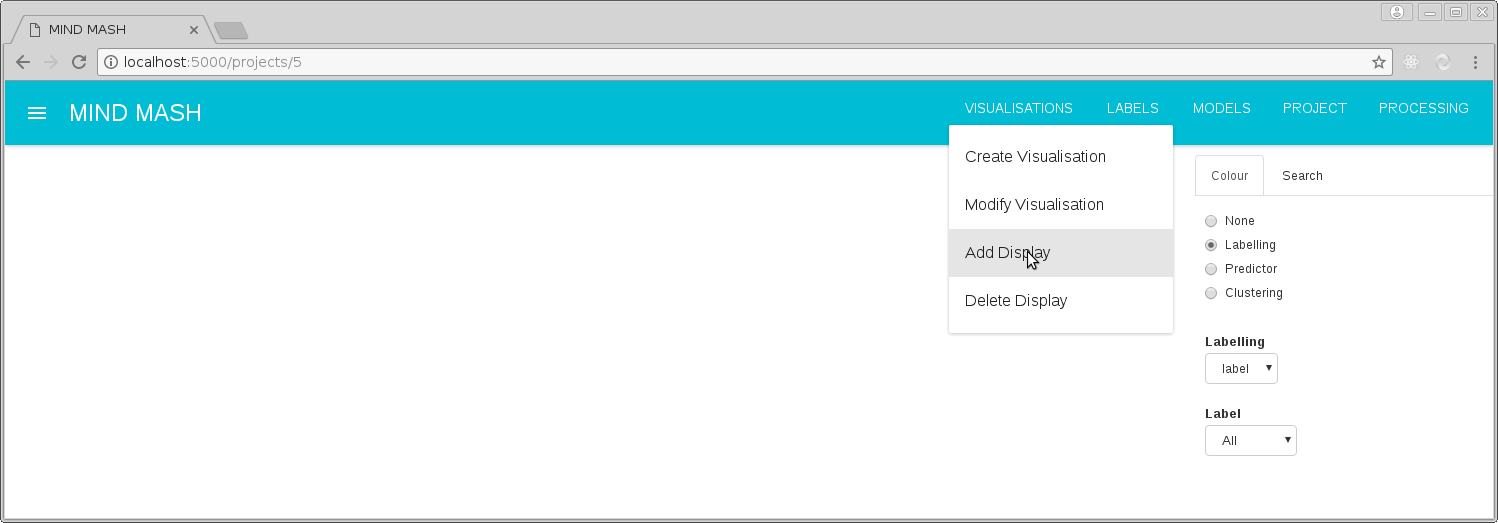

Call this display "table, and select "Table" as the display type.

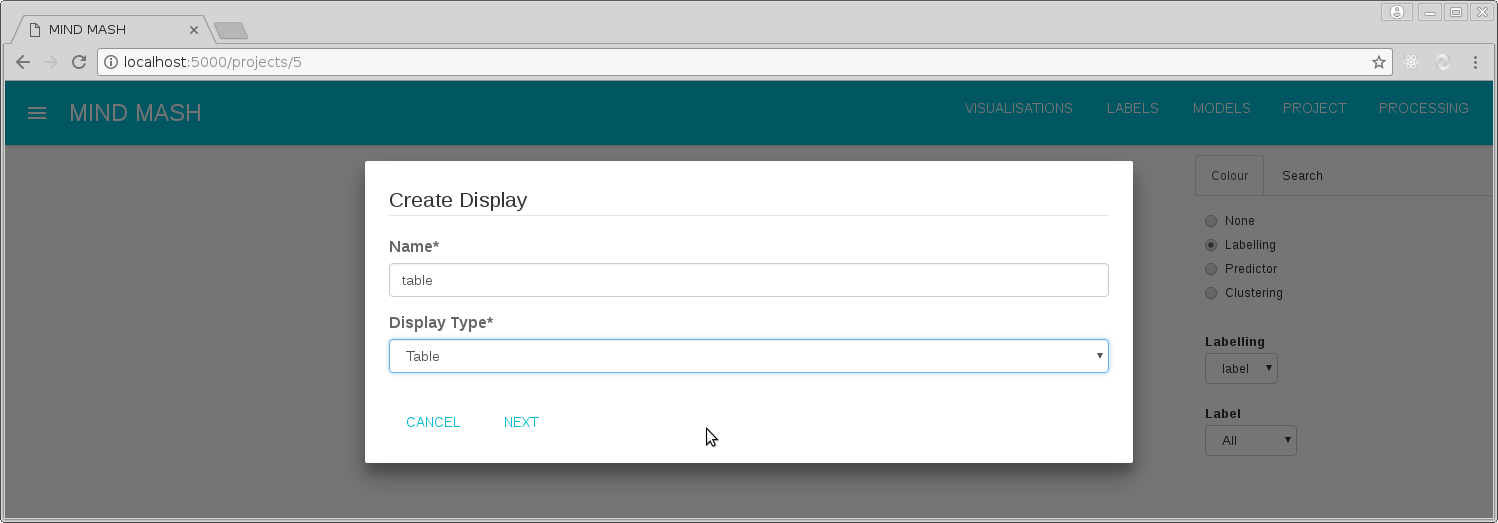

Click next, and the page will reload, to show a table of our data items, context and labels. This is not particularly helpful for us here, but might be if we had more contextual metadata about our data.

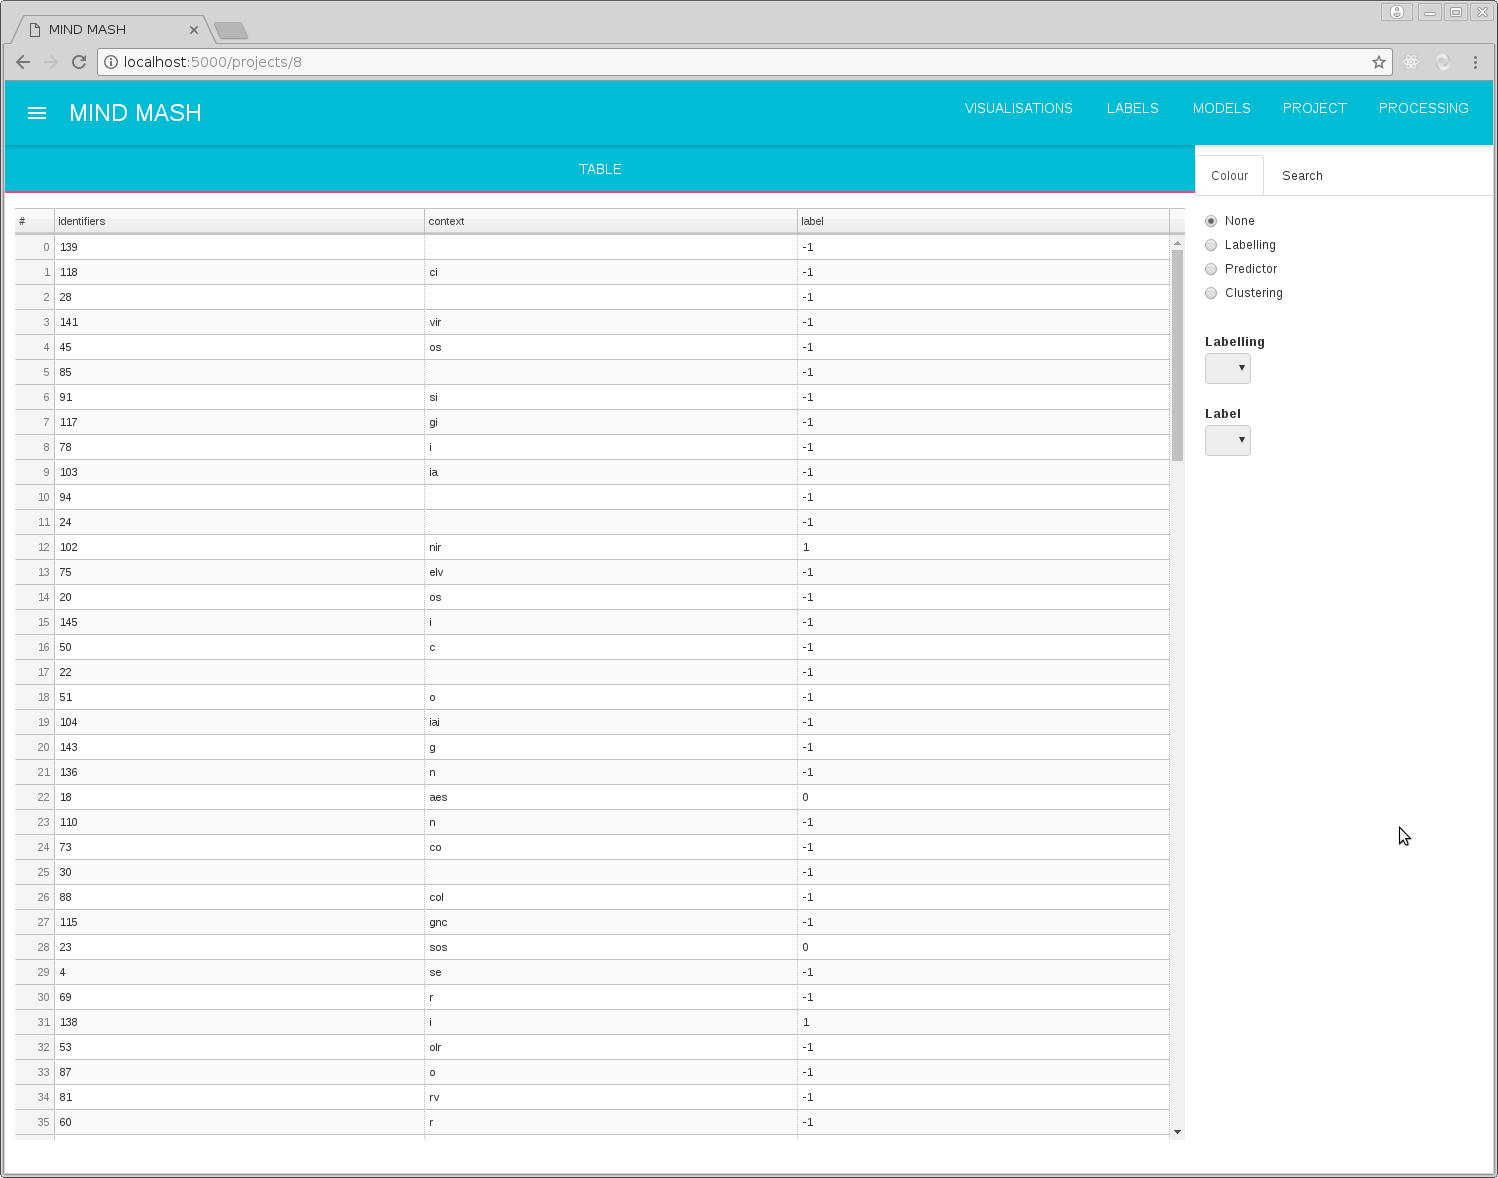


A more useful view might be the Detail view. Add another display (like you did with table), call it "Detail" and use the "DetailView" display type. The page will reload, and if you select the "Detail" tab you should see something like this.

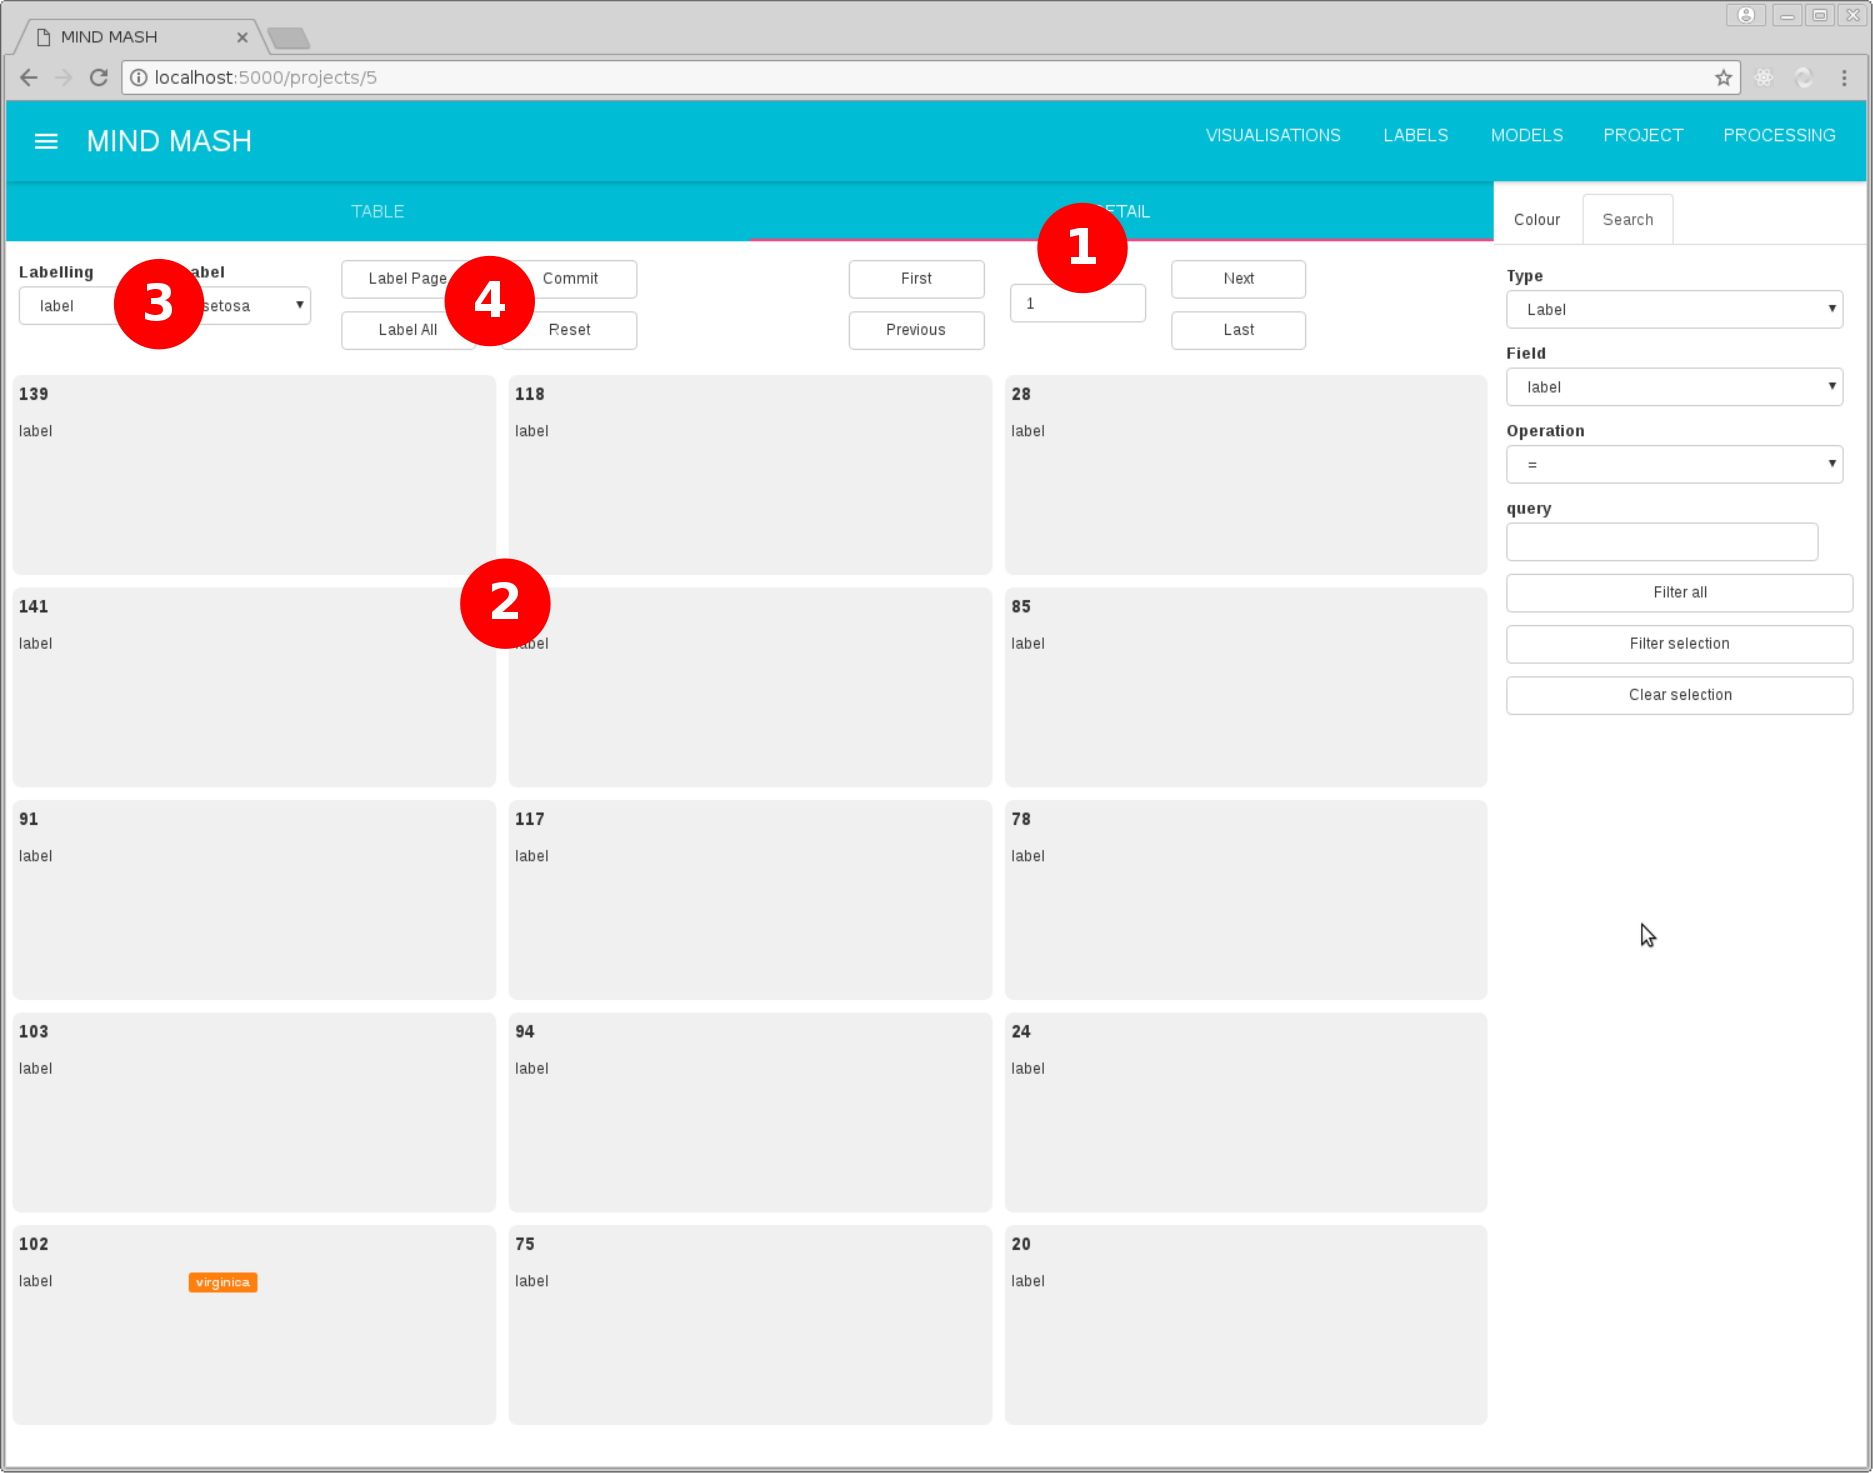

This is showing 15 items from our dataset, and we can navigate through our selected items with the paging controls at (1). (2) currently just shows the label of our data points, if they have one. We can add some more useful information by telling MIND MASH to show the context information here. Using the menu on the top right, go to "Project", then "Your Configuration" to get this menu.

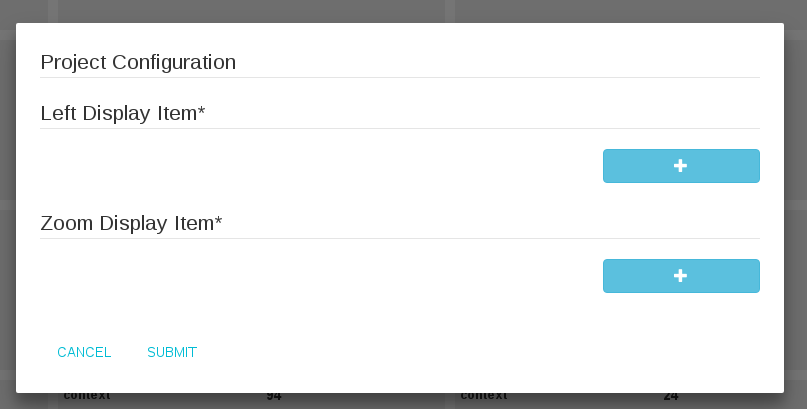

Now we can change what MIND MASH shows when it tries to display a representation of our data points. By the "Left Display item" click the "+" button, then select "context" as the field and "Raw value" for display as. Repeat this under the "Zoom display item" section and click "Submit". This will set MIND MASH to show the context information  we created as our representation, normally, as well as when we hover over items in the detail display. You should now see a "context" label on the left of each item, and get a tooltip with the context information on hovering. Although this is a contrived example, you can set these to whatever metadata is relevant for your dataset, or even images, longer text or audio.

# Creating Advanced Displays with Visualisations

Being able to visualise your data in 2D will be much more useful than what we've looked at so far. We're going to add a Scatter2D display to do this, but first we're going to have to create a visualisation. A visualisation in MIND MASH is some technique that allows a display to show your data nicely. Go to "Visualisations", then "Create Visualisation". Name it "umap", and then select UMAP (if UMAP is not available, one of the TSNE options is also appropriate). Check the measurements box as well, then click next. Leave the dimensions as "2D", and click submit.

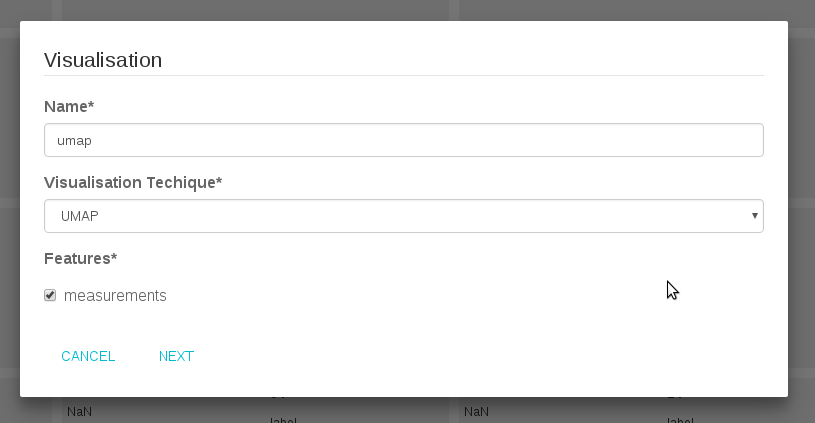

MIND MASH will do some processing in the background. You should see a pop up telling you its done, or you can check or you can check the processing menu, to see if its still working. Once it's finished, we can display our UMAP visualisation. Go to "Visualisations", "Add Display" then call it UMAP2D, select "Scatter2D" as the type and click next, then select our umap visualisation and click submit. After the page reloads you should get something that looks like this.

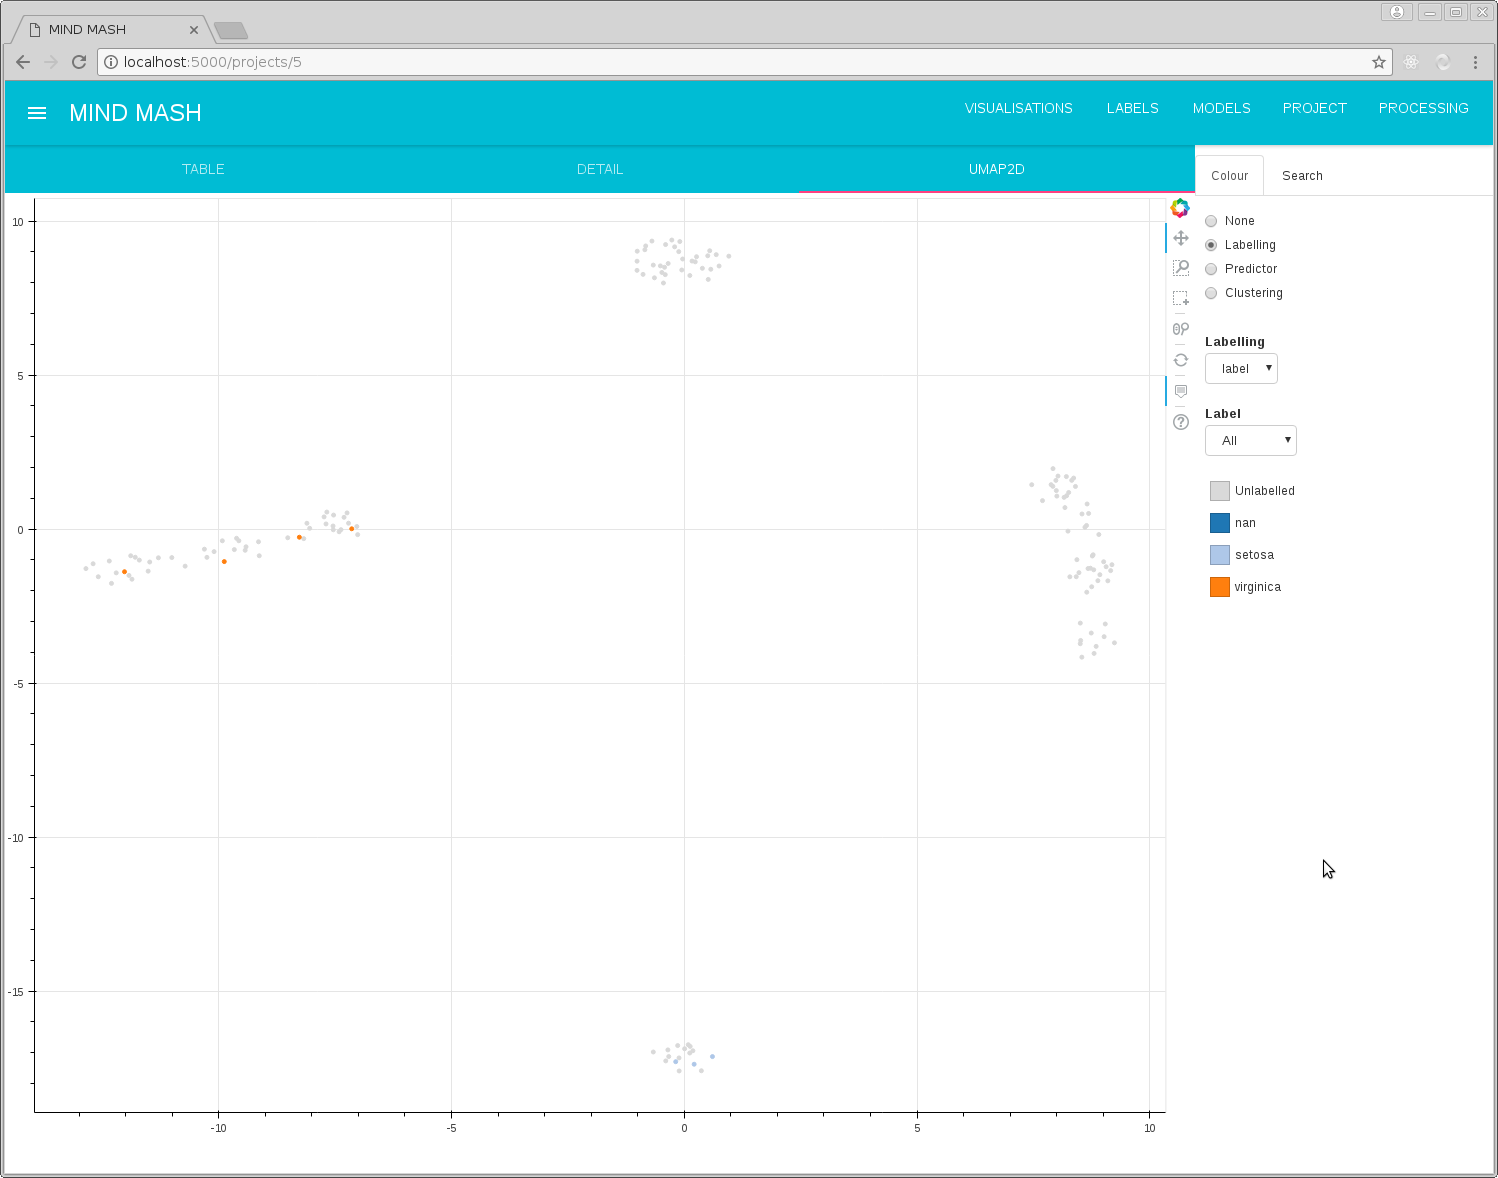

This should make it much easier to separate our data! Explore the plot for a bit. Try:
 * Hovering over data points and seeing the contextual information appear
 * Zooming in on clumps
 * Try selecting a clump with the box selection tool (a dashed box with a cross in the corner). Look at how the selected points are reflected in the detail and table displays as well.
 * Clear the selection by selecting a region with no points in it

So far we've ignored the Colour/Search panels on the right. These control the colour of some plots and allow you to search through your data. On the colour tab, select the "Labelling" radio button, and the few labelled points that we have should be coloured appropriately. Try changing the "Label" selection box, and see how it shows a binary view for each label: blue for positive, red for negative and grey for unknown.

Select the Search tab. Let's select all labelled examples of "setosa" by putting that into the query field and clicking "Filter all". If we change type to "Other", field to "context", operation to "regex" and set our query to "t" we can find the labelled setosa examples that have "t" in their context by using "Filter selection" rather than "Filter all".

# Labelling Points

Currently we have very few labelled points for two of our classes, and none for the "versicolor" species. Let's try adding some more in a couple of different ways. Each project can have a number of different labellings, each of which can have a number of different labels. We need to add a new label so that MIND MASH knows about the "versicolor" label in our data. Go to "Labels", then "Modify" in the top right menus. Select our labelling in the dropdown menu. and click next.

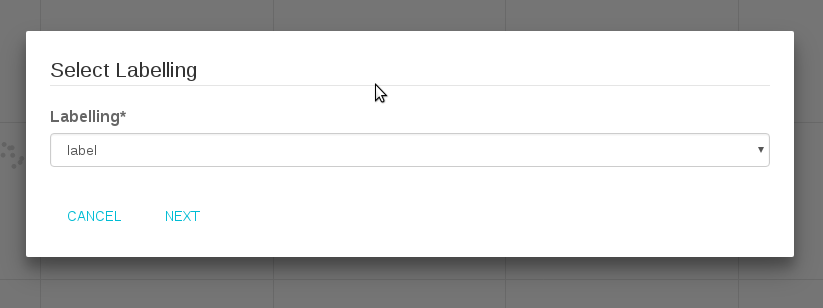

This next screen let's us modify our labelling. Let's start by changing the name to species, as that's more descriptive. We can leave the "Can items have more than one label?" tick box as it is, because irises can only have one species. Now we add another label by click in the blue "+" button near the bottom. This will add another entry, and we can fill in the name "versicolor", then click submit.

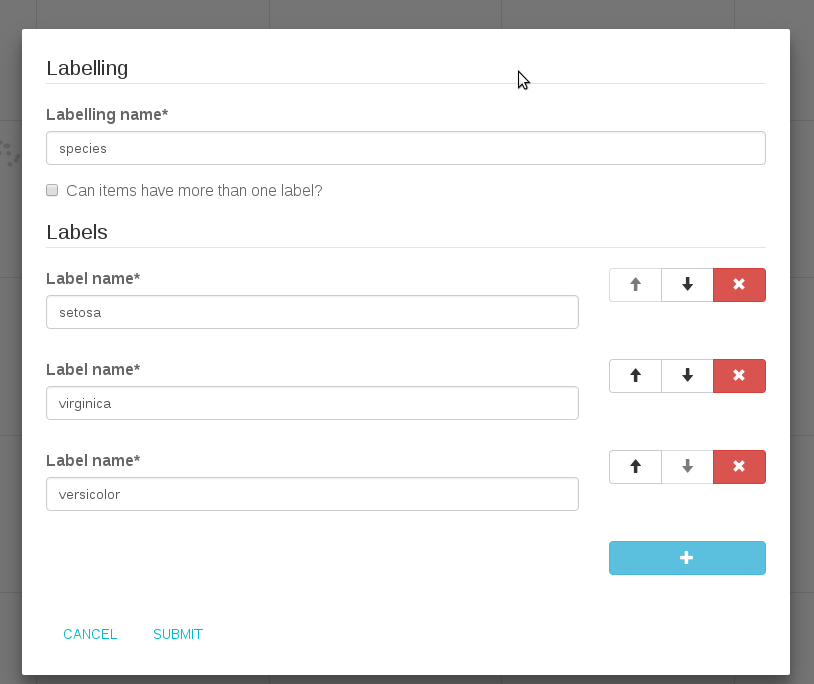

Now let's label some data points. Select a clump of unlabelled points on the scatter plot with a box select tool. This will select some similar points that we can hopefully apply the same label to quickly.

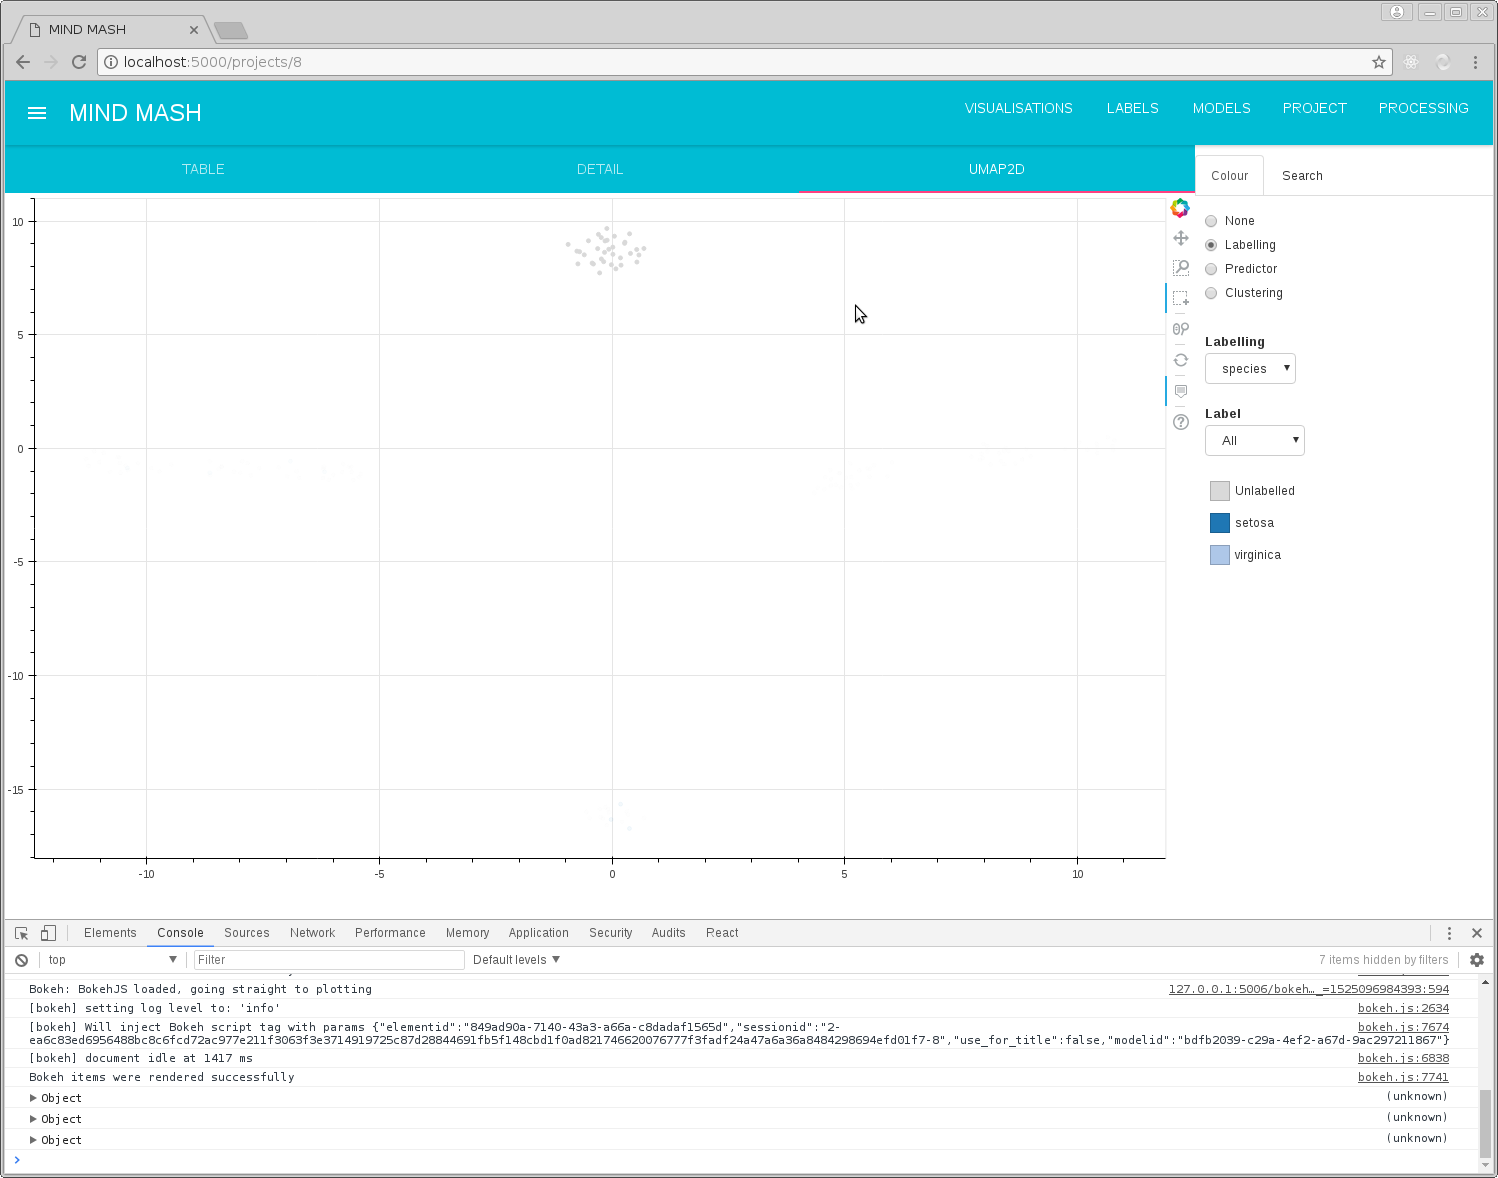

Now switch the Detail view tab. We can go through these clump, and when the context gives us enough information about the item, we can apply the appropriate label. In our contrived example, if the context has a 't' we know it it's a setosa, whilst if it has an 'g' its a virginica.

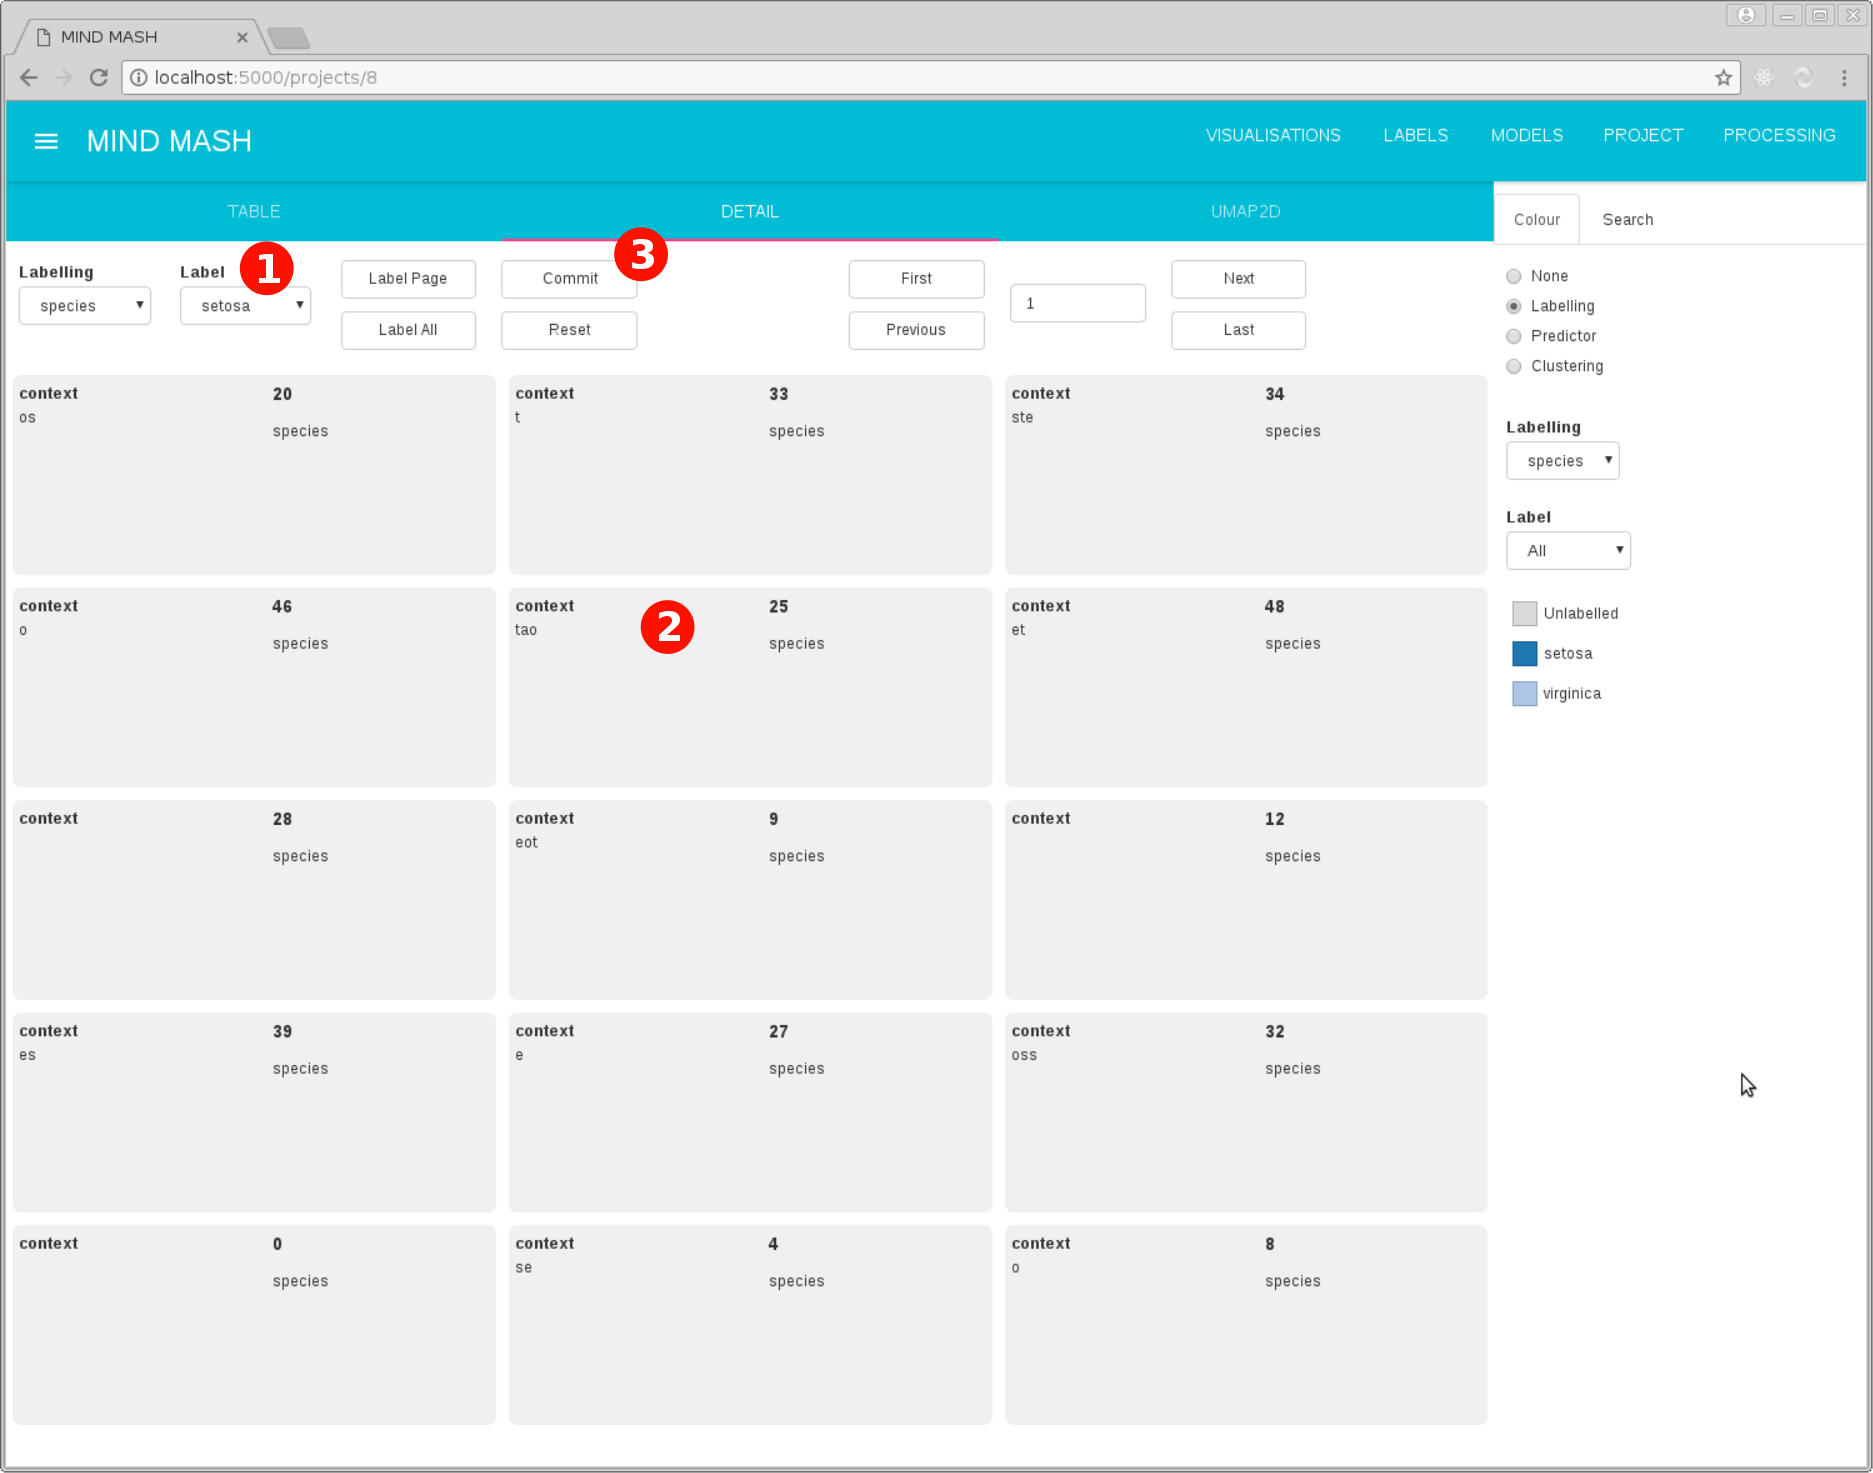

To apply labels to items, we can select the label to apply with the drop down at (1), and then click on items in the display to toggle their label (2). When we click the new label will appear with green text, and once we've done enough we can save those labels by clicking the "Commit" button at (3).

We can also search our data to select items. We know that only "virginica" items will have g in their context, so we can search (like we did above) to select those and then click the "Label all" buttom on the detail pane to label the current selection, followed by the commit button.

By exploring the scatter plot and examining and searching the context, label at least 6 examples of each of the three classes.

# Creating Predictive Models

Now that we have enough labelled examples of our classes, we can use MIND MASH to build a model on top of this. On the top-right menu go to "Models", then "Create Model". You should get a form like the below.

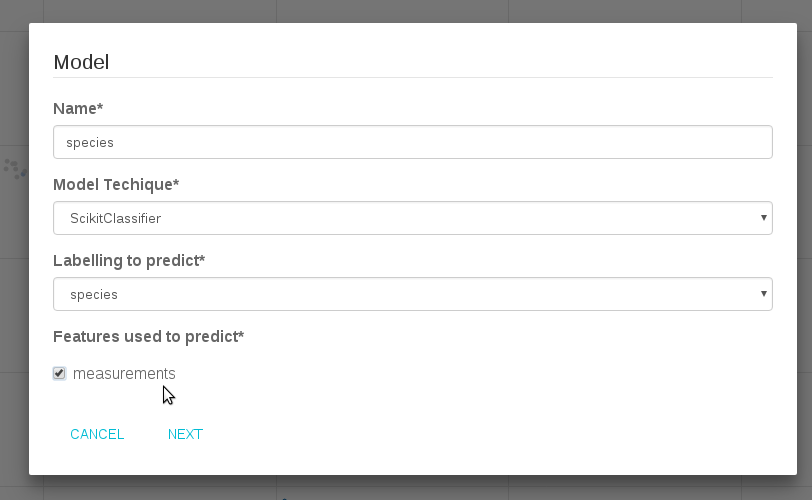

Name it some thing sensible, select the "ScikitClassifier" technique, set the "Labelling to predict" to our species labelling, and tell it to use our measurements features. Click next, and then leave the next page options as they are and click "Submit". MIND MASH will create a model and train it to predict the labels that you just set. Once it finishes, you can set the colour mode to be "Predictor" to to see how well it's performing on predicting each of the labels.

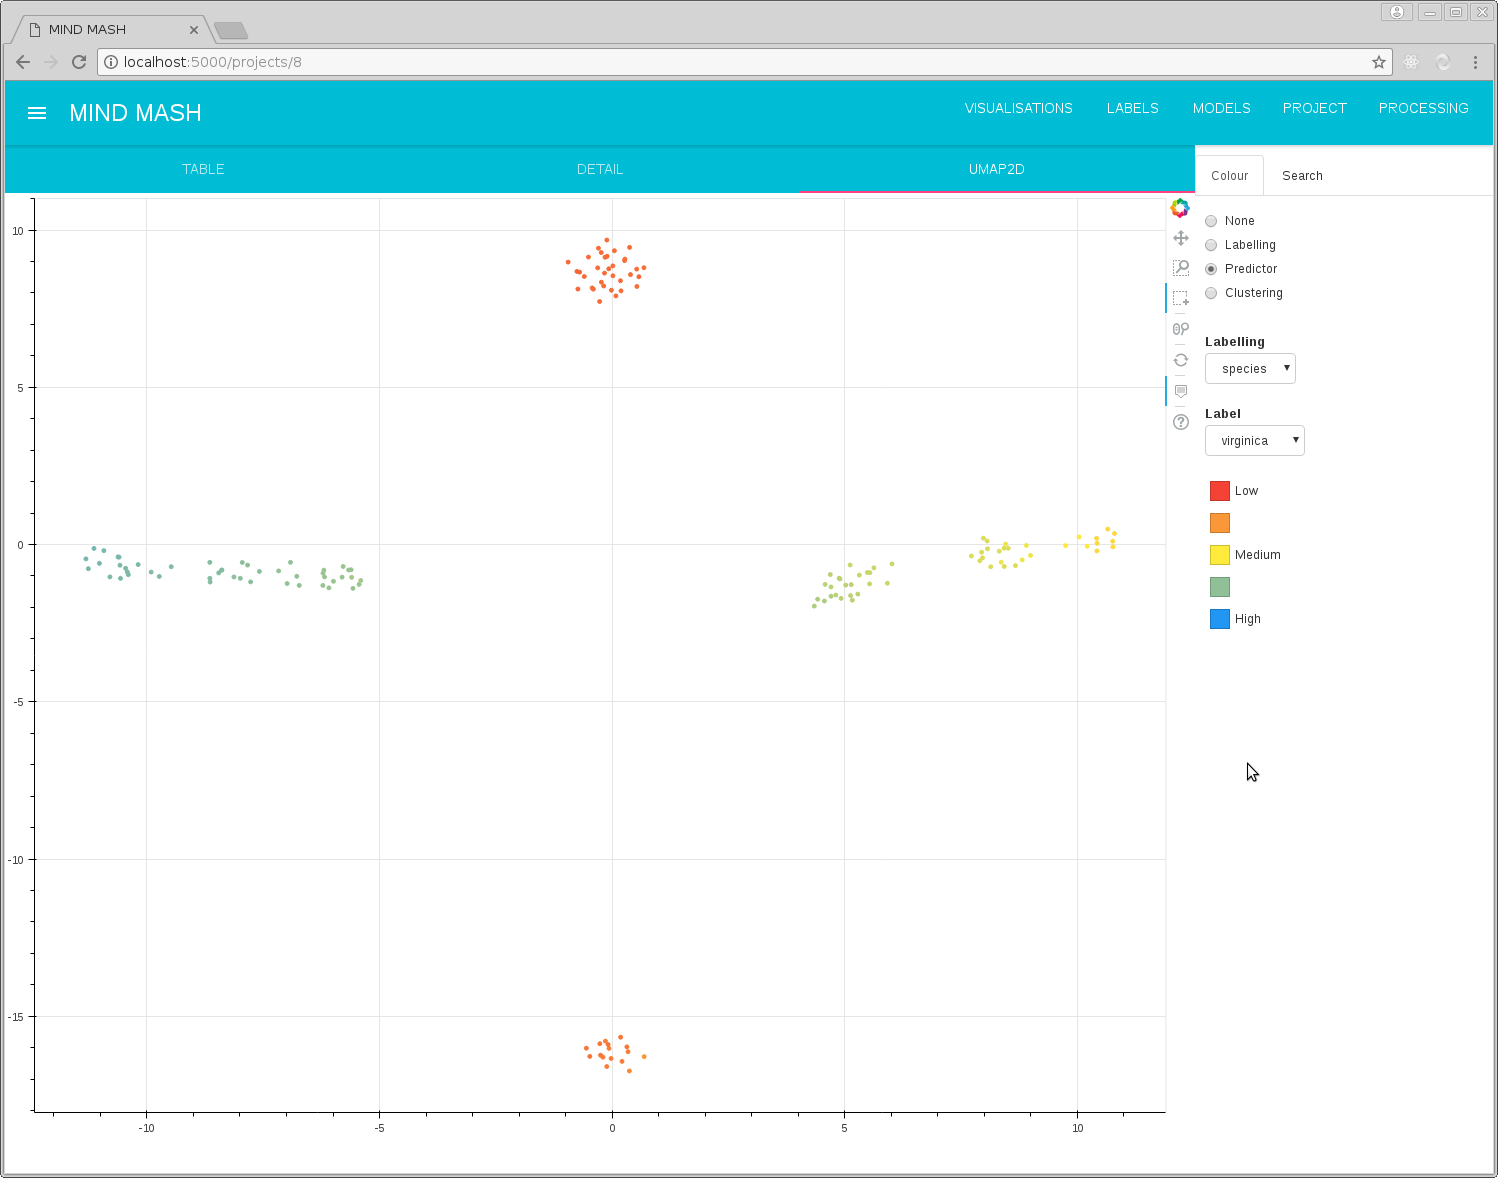

It probably won't be doing that well, as we have few labels. MIND MASH can now help us to improve the model by labelling more items. We'll do that by labelling the data points that our model is least sure about. We'll create a "Sampler" that will select a sample of data points that would be most helpful to the model if they were labelled. In the top-right menu go to "Models" and then "Create Sampler" to get to this form:

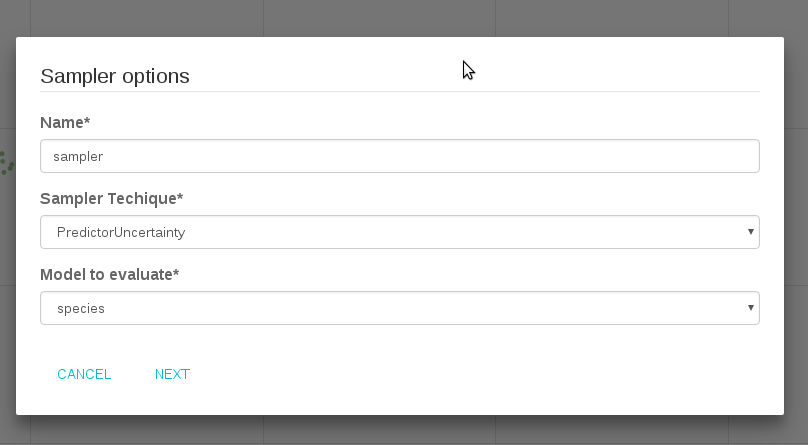

And fill it in with "PredictorUncertainty" as the technique and our "species" model, and click Next. Now, using the search pane, we can select the items our model is least certain about. Set the type to "Uncertainty", the field to "Species: sampler", the operation to "Top N", and the query value to 10. This will pick the 10 items thatthe model was least certain about when it was making predictions. Go to the detail pane and try and fill in some of the labels from the context. As soon as you click commit, our model and our sampler will update to show the new results. See if you can improve them.

# Clustering Data

Sometimes we can use other techniques to help make sense of our data. Clustering will use our measurements features to try and group our data, and hopefully some of these clusters will correspond to our labels. In the top-right menu go to "Visualisations" and then "Create Visualisation". Set the name to "hdbscan", and the technique to "HDBSCAN", select the measurements features and click next. Leave the default parameters and click "Submit".

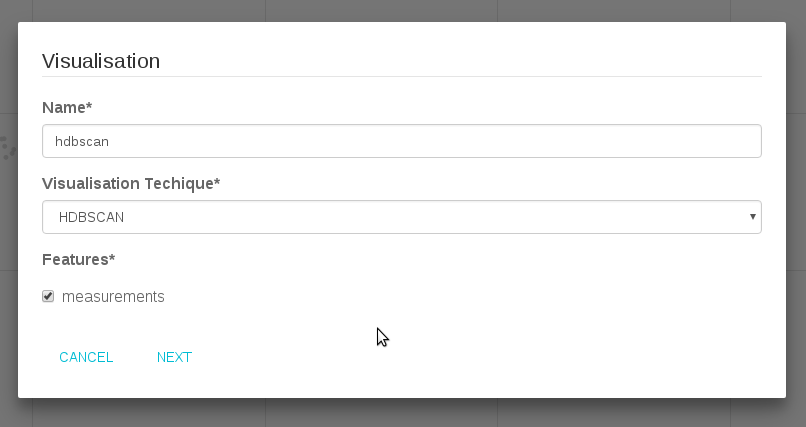

Technically clustering techniques are not usually described as visualisations, but for the purposes of MIND MASH they're just a way to visualise some aspect of our data. Once the processing completes, you should be able to select the cluster option on the Colour panel, and they're should be a number of distinct clusters (I got six).

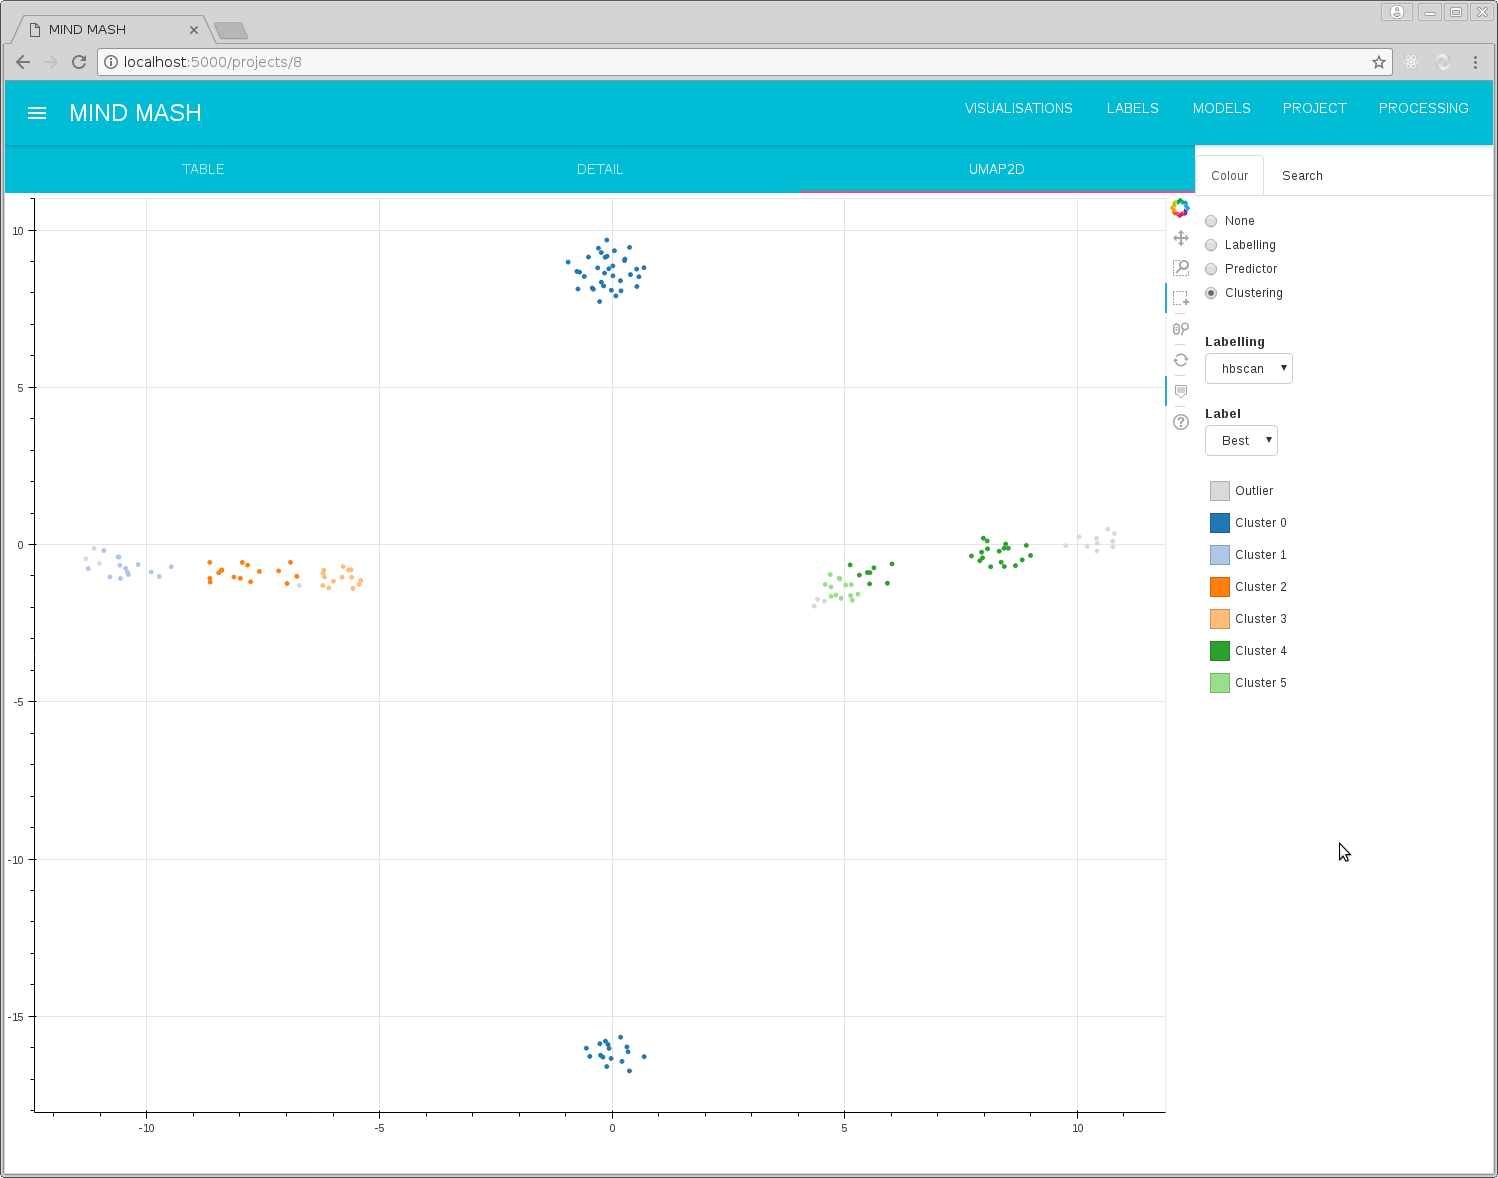

Let's now examine some of these clusters, and if we think they're sufficiently homogenous, we might choose to label them all with the same label. Use the search pane with "Cluster", "hdbscan" and "=" as the options and a cluster number as the query to select just the members of that cluster. Examine them in the detail view, looking at the context of those members that have them, and apply an appropriate label to the entire cluster, or just those that you are sure enough about.

# Bringing it all together

Using these techniques, try and label more of the dataset. I found setosa to be relatively easy to separate from the other two classes, but that they were more difficult to differentiate. You can use the search pane to also select by prediction, or construct more complex regex patterns to take advantage of context. You can also explore other predictors (try training a random forest model) or visualisations (try a 3D UMAP visualisation).

Finally, let's export our results back out of MIND MASH and see how we did. On the top-right menu go to "Project" and "Export" and select checkboxes to include labels and predictions. Hit submit and you'll download a CSV file of your labels and predictions. Let's compare it to the correct answers.

In [155]:
#read the data
out = pd.read_csv("~/data/iris_out.csv")

In [156]:
#get the top prediction and map to 0, 1 or 2
out["prediction"] = out[['predictor-species-setosa', 'predictor-species-versicolor', 'predictor-species-virginica']].idxmax(axis=1).replace({
    'predictor-species-setosa': 0,
    'predictor-species-versicolor': 1,
    'predictor-species-virginica': 2
})

In [157]:
# get the label, join together and map to 0, 1 or 2
joined_out = out[["identifiers", "prediction"]].join(df, on="identifiers")
joined_out["actual_label"] = joined_out["actual_species"].replace({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.97      0.70      0.81        50
  virginica       0.77      0.98      0.86        50

avg / total       0.91      0.89      0.89       150

Accuracy:  0.893333333333


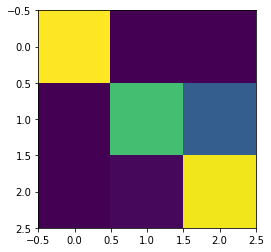

In [158]:
print(classification_report(joined_out["actual_label"], joined_out["prediction"], target_names=["setosa", "versicolor", "virginica"]))
print("Accuracy: ", accuracy_score(joined_out["actual_label"], joined_out["prediction"]))
plt.show(plt.imshow(confusion_matrix(joined_out["actual_label"], joined_out["prediction"])))